In [10]:
import numpy as np
import pandas as pd
import pykinosh.core as pkc

In [11]:
import seaborn as sms
import matplotlib.pyplot as plt

In [12]:
import pykinosh.core as pkc

In [13]:
from pykinosh.core import *

In [14]:
connect_db(dbms = 'sqlserver',database_name = "Chinook", username="DESKTOP-Q5LHAFA")

These are the tables available in the Chinook database: ['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Track', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist'].
The following DataFrames have been created: ['album_df', 'artist_df', 'customer_df', 'employee_df', 'genre_df', 'track_df', 'invoice_df', 'invoiceline_df', 'mediatype_df', 'playlist_df'].


In [15]:
pkc.mediatype_df.head()

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [16]:
invoiceline_df

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
...,...,...,...,...,...
2235,2236,411,3136,0.99,1
2236,2237,411,3145,0.99,1
2237,2238,411,3154,0.99,1
2238,2239,411,3163,0.99,1


In [17]:
artist_df.head()

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


In [18]:
customer_freq = invoice_df.groupby('CustomerId')['InvoiceId'].count().reset_index()
customer_freq.head()

,CustomerId,InvoiceId
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7


In [19]:
customer_freq.columns = ('CustomerId','num_purchases')
customer_freq.head()

,CustomerId,num_purchases
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7


In [20]:
customer_freq.head()

,CustomerId,num_purchases
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7


In [21]:
customer_df.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [22]:
customer_country = pd.merge(customer_freq,customer_df[['CustomerId','Country']],on = 'CustomerId')
customer_country

,CustomerId,num_purchases,Country
0,1,7,Brazil
1,2,7,Germany
2,3,7,Canada
3,4,7,Norway
4,5,7,Czech Republic
5,6,7,Czech Republic
6,7,7,Austria
7,8,7,Belgium
8,9,7,Denmark
9,10,7,Brazil


In [23]:
avg_freq = customer_country.groupby("Country")['num_purchases'].median().sort_values(ascending = False)
avg_freq.head()

Country
Argentina    7.0
Australia    7.0
USA          7.0
Sweden       7.0
Spain        7.0
Name: num_purchases, dtype: float64

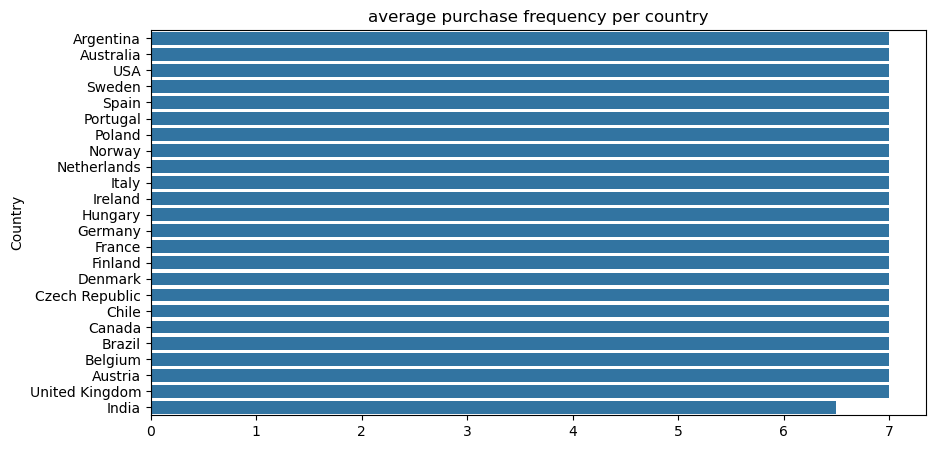

In [24]:
plt.figure(figsize =(10,5))
sms.barplot(x =avg_freq.values, y = avg_freq.index).set_title('average purchase frequency per country');

</h1 payment patterns h1/>

In [25]:
invoice_df["YearMonth"]= invoice_df["InvoiceDate"].dt.to_period("M")

In [26]:
sample =invoice_df.copy()

In [27]:
sample["quater"]= sample["InvoiceDate"].dt.to_period("Q")

In [28]:
sample["quater"].head()

0    2021Q1
1    2021Q1
2    2021Q1
3    2021Q1
4    2021Q1
Name: quater, dtype: period[Q-DEC]

In [29]:
invoice_df['YearMonth'].dtype

period[M]

In [30]:
payment_pattern = pd.crosstab(invoice_df["YearMonth"],invoice_df["BillingCountry"])
payment_pattern

BillingCountry,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Czech Republic,Denmark,Finland,...,Ireland,Italy,Netherlands,Norway,Poland,Portugal,Spain,Sweden,USA,United Kingdom
YearMonth,,,,,,,,,,,,,,,,,,,,,
2021-01,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2021-02,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2021-03,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
2021-04,0,1,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2021-05,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2021-06,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,3,0
2021-07,0,1,0,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2021-08,0,0,0,1,0,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2021-09,0,0,0,0,2,1,0,0,1,0,...,1,0,0,0,0,0,0,0,2,0


## top 10 artist by revenue

In [31]:
artist_df

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


In [32]:
track_df=pkc.track_df
track_df

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [33]:
album_df', 'artist_df', 'customer_df', 'employee_df', 'genre_df', 'track_df', 'invoice_df', 'invoiceline_df', 'mediatype_df', 'playlist_df'].

SyntaxError: unterminated string literal (detected at line 1) (2790417618.py, line 1)

In [40]:
album_artist=pd.merge(album_df,artist_df,how='inner',on = 'ArtistId')
album_artist

,AlbumId,Title,ArtistId,Name
0,1,For Those About To Rock We Salute You,1,AC/DC
1,2,Balls to the Wall,2,Accept
2,3,Restless and Wild,2,Accept
3,4,Let There Be Rock,1,AC/DC
4,5,Big Ones,3,Aerosmith
...,...,...,...,...
342,343,Respighi:Pines of Rome,226,Eugene Ormandy
343,344,Schubert: The Late String Quartets & String Qu...,272,Emerson String Quartet
344,345,Monteverdi: L'Orfeo,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
345,346,Mozart: Chamber Music,274,Nash Ensemble


In [41]:
album_track =pd.merge(track_df,album_artist,on ='AlbumId',how ='inner')
album_track

,TrackId,Name_x,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,Title,ArtistId,Name_y
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,For Those About To Rock We Salute You,1,AC/DC
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Balls to the Wall,2,Accept
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Restless and Wild,2,Accept
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Restless and Wild,2,Accept
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,Restless and Wild,2,Accept
...,...,...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,Respighi:Pines of Rome,226,Eugene Ormandy
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Schubert: The Late String Quartets & String Qu...,272,Emerson String Quartet
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Monteverdi: L'Orfeo,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Mozart: Chamber Music,274,Nash Ensemble


In [42]:
album_track=album_track.rename(columns = {'Name_x':'Track_name','Name_y':'Artist_name'})

In [43]:
old_sales_df= pd.merge(album_track,invoiceline_df,how ='inner',on ='TrackId')
old_sales_df

,TrackId,Track_name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice_x,Title,ArtistId,Artist_name,InvoiceLineId,InvoiceId,UnitPrice_y,Quantity
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,For Those About To Rock We Salute You,1,AC/DC,579,108,0.99,1
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Balls to the Wall,2,Accept,1,1,0.99,1
2,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Balls to the Wall,2,Accept,1154,214,0.99,1
3,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Restless and Wild,2,Accept,1728,319,0.99,1
4,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Restless and Wild,2,Accept,2,1,0.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3494,"Symphony No. 2, Op. 16 - ""The Four Temperamen...",338,2,24,Carl Nielsen,286998,4834785,0.99,Nielsen: The Six Symphonies,267,Göteborgs Symfoniker & Neeme Järvi,1726,319,0.99,1
2236,3496,"Étude 1, In C Major - Preludio (Presto) - Liszt",340,4,24,None,51780,2229617,0.99,Liszt - 12 Études D'Execution Transcendante,269,Michele Campanella,577,108,0.99,1
2237,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,Respighi:Pines of Rome,226,Eugene Ormandy,1153,214,0.99,1
2238,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Schubert: The Late String Quartets & String Qu...,272,Emerson String Quartet,578,108,0.99,1


In [44]:
sales_df= pd.merge(old_sales_df,invoice_df,how ='inner',on ='InvoiceId')

In [45]:
sales_df.columns

Index(['TrackId', 'Track_name', 'AlbumId', 'MediaTypeId', 'GenreId',
       'Composer', 'Milliseconds', 'Bytes', 'UnitPrice_x', 'Title', 'ArtistId',
       'Artist_name', 'InvoiceLineId', 'InvoiceId', 'UnitPrice_y', 'Quantity',
       'CustomerId', 'InvoiceDate', 'BillingAddress', 'BillingCity',
       'BillingState', 'BillingCountry', 'BillingPostalCode', 'Total',
       'YearMonth'],
      dtype='object')

In [46]:
new_sales_df =sales_df[['Artist_name','Total']]

In [47]:
new_sales_df.columns =['Artistname','revenue']

In [48]:
new_sales_df=new_sales_df.groupby("Artistname")['revenue'].sum().sort_values(ascending = False)

In [49]:
top_artist_rev = new_sales_df.head(10).reset_index()

In [50]:
top_artist_rev

,Artistname,revenue
0,Iron Maiden,1233.54
1,U2,895.59
2,Lost,833.70
3,Led Zeppelin,620.73
4,Metallica,599.94
5,Deep Purple,550.44
6,Pearl Jam,408.87
7,Lenny Kravitz,372.51
8,Van Halen,336.82
9,The Office,328.80


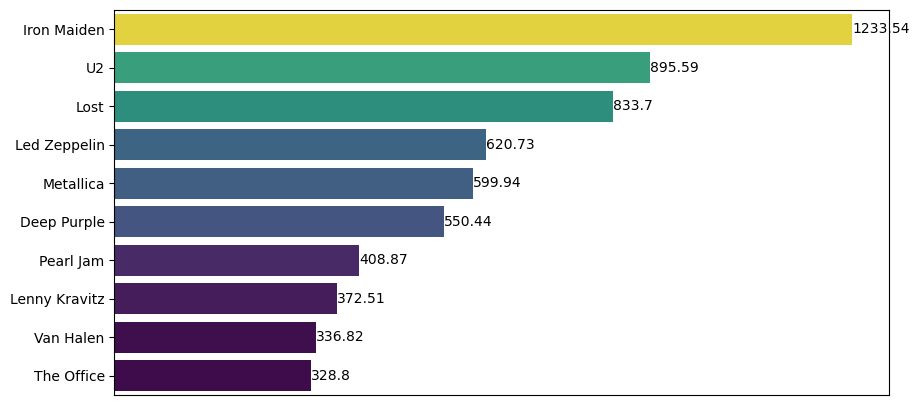

In [51]:
plt.figure(figsize=(10,5));
ax=sms.barplot(data =top_artist_rev,y= 'Artistname',x ='revenue',hue="revenue",legend = False,palette='viridis');
ax.set(ylabel="",xlabel="");
ax.set_xticks([])
for container in ax.containers:
    ax.bar_label(container)
    

## to 10 country based on revenue

In [52]:
album_df', 'artist_df', 'customer_df', 'employee_df', 'genre_df', 'track_df', 'invoice_df', 'invoiceline_df', 'mediatype_df', 'playlist_df'].

SyntaxError: unterminated string literal (detected at line 1) (2790417618.py, line 1)

In [53]:
cust_invoice = pd.merge(customer_df,invoice_df,how = 'inner',on='CustomerId' )
cust_invoice.columns

Index(['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City',
       'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email',
       'SupportRepId', 'InvoiceId', 'InvoiceDate', 'BillingAddress',
       'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode',
       'Total', 'YearMonth'],
      dtype='object')

In [54]:
country_rev = sales_df[['BillingCountry','Total']]
country_rev.columns =['BillingCountry','revenue']
top_country_rev=country_rev.groupby('BillingCountry')['revenue'].sum().sort_values(ascending = False)
top_country_rev

BillingCountry
USA               4667.06
Canada            2689.96
France            1722.10
Brazil            1677.10
Germany           1392.48
United Kingdom    1003.86
Czech Republic     879.24
Portugal           687.24
India              667.28
Ireland            446.62
Hungary            446.62
Chile              415.62
Austria            404.62
Norway             362.62
Netherlands        352.62
Finland            350.62
Sweden             340.62
Australia          334.62
Denmark            334.62
Italy              334.62
Poland             334.62
Belgium            334.62
Spain              334.62
Argentina          334.62
Name: revenue, dtype: float64

In [55]:
top_10_countries = top_country_rev.head(10).reset_index()
top_10_countries

,BillingCountry,revenue
0,USA,4667.06
1,Canada,2689.96
2,France,1722.10
3,Brazil,1677.10
4,Germany,1392.48
5,United Kingdom,1003.86
6,Czech Republic,879.24
7,Portugal,687.24
8,India,667.28
9,Ireland,446.62


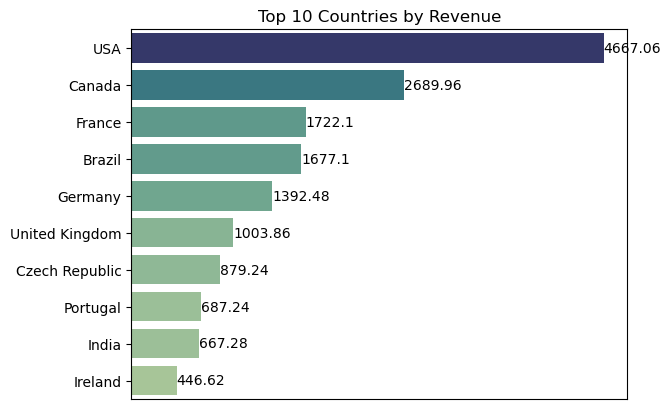

In [56]:
ax =sms.barplot(data = top_10_countries, x ='revenue',y='BillingCountry',hue= 'revenue',legend=False,palette= 'crest');
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 Countries by Revenue');
plt.xticks([]);
plt.xlabel("");
plt.ylabel('');

In [57]:
sales_df.columns

Index(['TrackId', 'Track_name', 'AlbumId', 'MediaTypeId', 'GenreId',
       'Composer', 'Milliseconds', 'Bytes', 'UnitPrice_x', 'Title', 'ArtistId',
       'Artist_name', 'InvoiceLineId', 'InvoiceId', 'UnitPrice_y', 'Quantity',
       'CustomerId', 'InvoiceDate', 'BillingAddress', 'BillingCity',
       'BillingState', 'BillingCountry', 'BillingPostalCode', 'Total',
       'YearMonth'],
      dtype='object')

In [58]:
genre_sales = pd.merge(genre_df,sales_df,how= 'inner',on ='GenreId')
genre_sales.rename(columns ={'Name':'Genre_Name','Total':'revenue'},inplace =True)
genre_sales.columns

Index(['GenreId', 'Genre_Name', 'TrackId', 'Track_name', 'AlbumId',
       'MediaTypeId', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice_x',
       'Title', 'ArtistId', 'Artist_name', 'InvoiceLineId', 'InvoiceId',
       'UnitPrice_y', 'Quantity', 'CustomerId', 'InvoiceDate',
       'BillingAddress', 'BillingCity', 'BillingState', 'BillingCountry',
       'BillingPostalCode', 'revenue', 'YearMonth'],
      dtype='object')

In [59]:
genre_rev=genre_sales[['Genre_Name','revenue']]

In [60]:
top_genre=genre_rev.groupby('Genre_Name')['revenue'].sum().sort_values(ascending = False)
top_genre.head(10)

Genre_Name
Rock                  7720.02
Latin                 3472.55
Metal                 2093.13
Alternative & Punk    1961.66
TV Shows               817.71
Jazz                   746.46
Drama                  544.61
Blues                  429.66
R&B/Soul               338.62
Reggae                 332.64
Name: revenue, dtype: float64

In [61]:
top_10_genre=top_genre.head(10).reset_index()
top_10_genre

,Genre_Name,revenue
0,Rock,7720.02
1,Latin,3472.55
2,Metal,2093.13
3,Alternative & Punk,1961.66
4,TV Shows,817.71
5,Jazz,746.46
6,Drama,544.61
7,Blues,429.66
8,R&B/Soul,338.62
9,Reggae,332.64


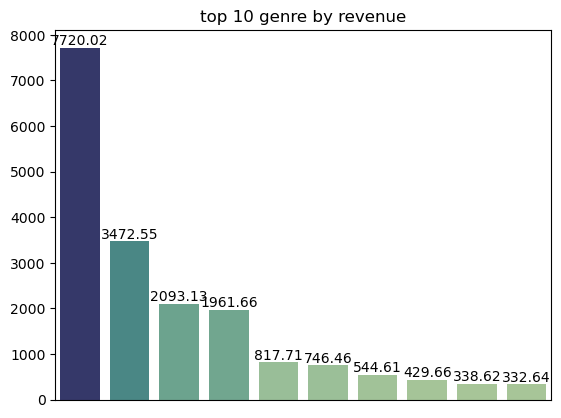

In [62]:
ax=sms.barplot(data=top_10_genre,x ='Genre_Name',y ="revenue",hue = "revenue",palette = 'crest',legend= False);
plt.title('top 10 genre by revenue');
for container in ax.containers:
    ax.bar_label(container)
plt.xticks([]);
plt.xlabel('')
plt.ylabel('');

In [63]:
full_sales = pd.merge(genre_sales,mediatype_df,how ='inner',on='MediaTypeId')
full_sales.rename(columns={'Name':'MediaTypeName'}, inplace=True)

In [64]:
media_revenue= full_sales.groupby('MediaTypeName')['revenue'].sum().reset_index()
media_revenue=media_revenue.sort_values(by = 'revenue',ascending=False)
media_revenue=media_revenue.head(3)

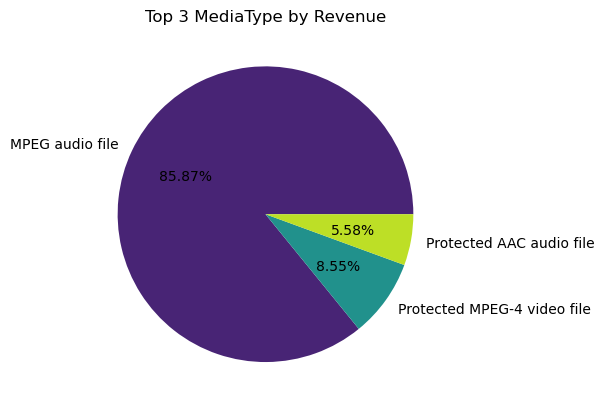

In [65]:
from matplotlib import cm
mine = cm.viridis([0.1,0.5,0.9])
plt.title('Top 3 MediaType by Revenue')
plt.pie(media_revenue['revenue'], labels=media_revenue['MediaTypeName'],colors=mine,autopct='%1.2f%%');


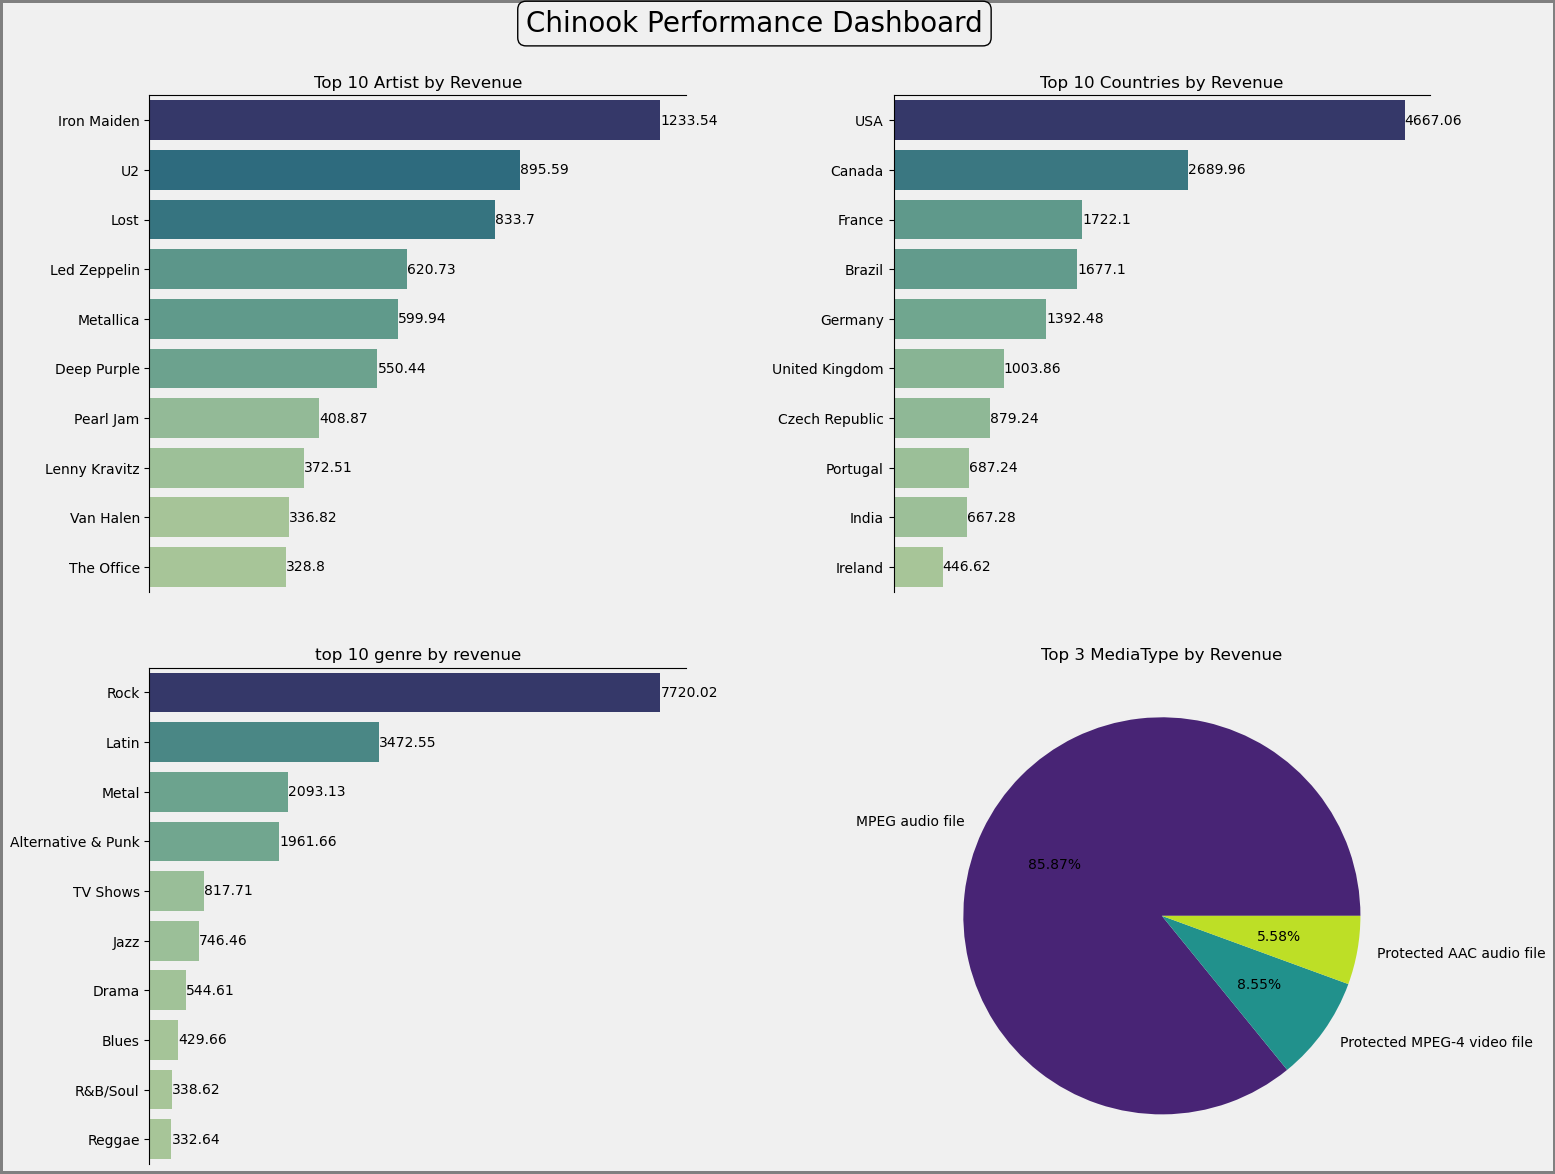

In [69]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize = (16,12));
#fig.suptitle("Chinook Performance Dashboard",fontsize = 20);
fig.text(0.5,0.99,"Chinook Performance Dashboard",fontsize = 20,ha='center',
         bbox = dict(facecolor='#f0f0f0',boxstyle ='round,pad=0.3'))
fig.patch.set_linewidth(3)
fig.patch.set_facecolor('#f0f0f0')
fig.patch.set_edgecolor('grey')

sms.barplot(data =top_artist_rev,y= 'Artistname',x ='revenue',hue="revenue",legend = False,
               palette='crest',ax = ax[0,0]);
ax[0,0].set(ylabel="",xlabel="");
ax[0,0].set_xticks([])
ax[0,0].set_facecolor('#f0f0f0')
ax[0,0].set_title('Top 10 Artist by Revenue');
for container in ax[0,0].containers:
    ax[0,0].bar_label(container)
ax[0,0].spines['right'].set_visible(False)  
ax[0,0].spines['bottom'].set_visible(False)


sms.barplot(data = top_10_countries, x ='revenue',y='BillingCountry',hue= 'revenue',
            legend=False,palette= 'crest',ax=ax[0,1])
for container in ax[0,1].containers:
    ax[0,1].bar_label(container)
ax[0,1].set_title('Top 10 Countries by Revenue');
ax[0,1].set_xticks([]);
ax[0,1].set_xlabel("");
ax[0,1].set_ylabel('');
ax[0,1].set_facecolor('#f0f0f0')
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['bottom'].set_visible(False)

sms.barplot(data=top_10_genre,x ="revenue",y ='Genre_Name',hue = "revenue",palette = 'crest',
            legend= False,ax=ax[1,0]);
ax[1,0].set_title('top 10 genre by revenue');
for container in ax[1,0].containers:
    ax[1,0].bar_label(container)
ax[1,0].set_xticks([]);
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('');
ax[1,0].set_facecolor('#f0f0f0')
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['bottom'].set_visible(False)

from matplotlib import cm
mine = cm.viridis([0.1,0.5,0.9])
ax[1,1].set_title('Top 3 MediaType by Revenue')
ax[1,1].pie(media_revenue['revenue'], labels=media_revenue['MediaTypeName'],colors=mine,autopct='%1.2f%%');

plt.tight_layout(pad=4)

plt.savefig(r"C:\Users\USER PC\Pictures\chinooh.png")

plt.show()